<a href="https://colab.research.google.com/github/Buzzrightear/CO885_dissertation/blob/master/Simple_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taken from here: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

import matplotlib
matplotlib.use('Agg') #https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable 
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [ ]:
#Import data

df = pd.read_csv('https://raw.githubusercontent.com/Buzzrightear/CO885_dissertation/master/wind_data_3.csv', parse_dates=['Date time']) #Read in csv to dataframe
df=df[['Date time','Power avg']].dropna()

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
RMSE is:  190.9496995920514


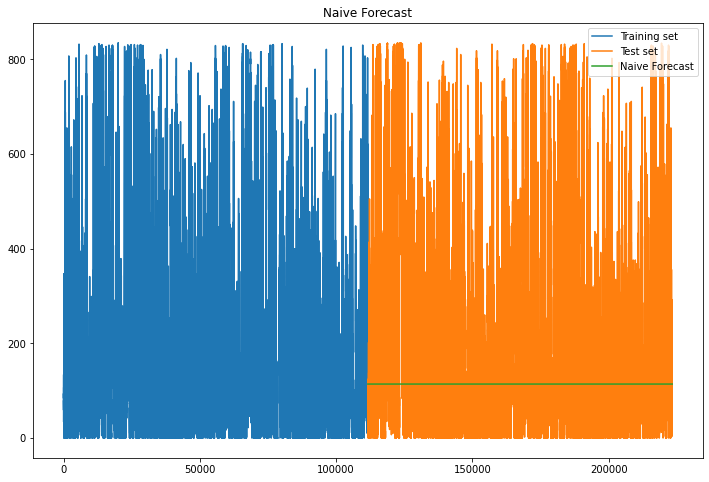

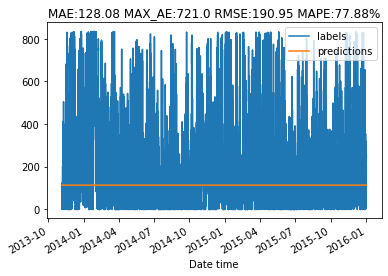

In [ ]:
# Half dataset prediction:

df_training = df.head(int(df.shape[0]*0.5))
df_test = df.tail(int(df.shape[0]*0.5))
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
"""
plt.figure(figsize=(12,8))
plt.plot(df_training.index, df_training['Power avg'], label='Training set')
plt.plot(df_test.index, df_test['Power avg'], label='Test set')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


rms = sqrt(mean_squared_error(df_test['Power avg'], y_hat.naive))
print("RMSE is: ", rms)
"""

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')



            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  0.0


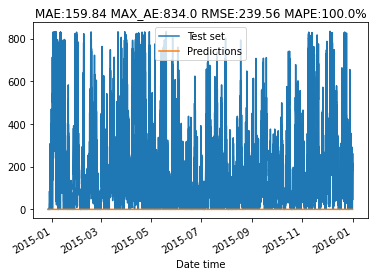

In [ ]:
# 1 year prediction:

df_training = df.head(df.shape[0]-144*365)
df_test = df.tail(144*365)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')







            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  193.0


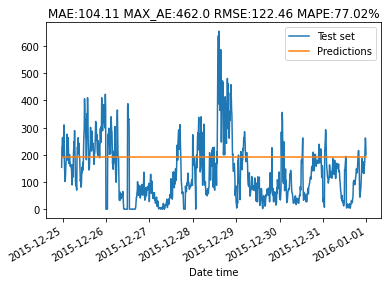

In [ ]:
# 1 week prediction:

df_training = df.head(df.shape[0]-144*7)
df_test = df.tail(144*7)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  150.0


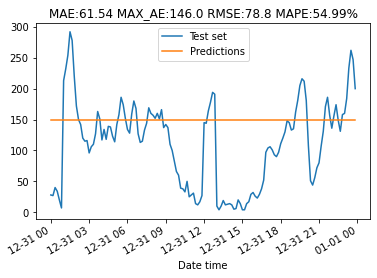

In [ ]:
# 1 day prediction:

df_training = df.head(df.shape[0]-144)
df_test = df.tail(144)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  27.0


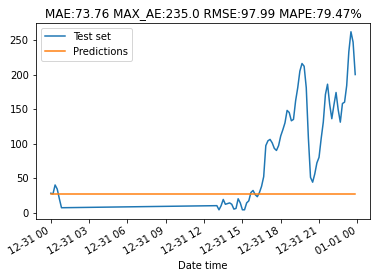

In [ ]:
# 12 hours prediction:

df_training = df.head(df.shape[0]-72)
df_test = df.tail(72)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  158.0
6


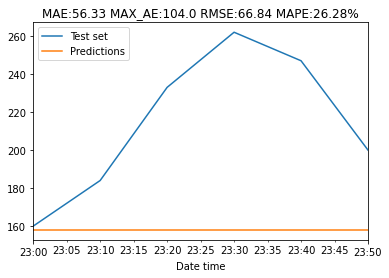

In [ ]:
# 1 hour prediction:

df_training = df.head(df.shape[0]-6)
df_test = df.tail(6)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')
print(df_test.shape[0])

            Date time  Power avg
0 2011-09-01 00:10:00       78.0
1 2011-09-01 00:20:00       77.0
2 2011-09-01 00:30:00       72.0
3 2011-09-01 00:40:00       70.0
4 2011-09-01 00:50:00       62.0
Naive value is:  262.0
2


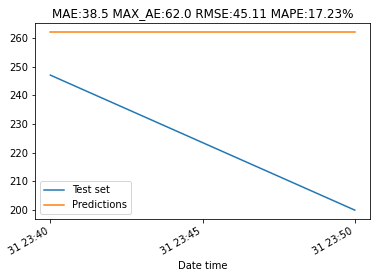

In [ ]:
# 10 minute prediction:

df_training = df.head(df.shape[0]-2)
df_test = df.tail(2)
print(df_training.head())


dd= np.asarray(df_training)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1][1]
print("Naive value is: ", dd[len(dd)-1][1])

EPSILON = 1e-10
#predictions = rf.predict(features.drop('Date time', axis=1)) # Each call to this function just gives a set of features (dates) as a param and returns a dataframe of 'labels' (power avg values)
errors = abs(y_hat.naive - df_test['Power avg']) #predicted values numpy array minus actual values numpy array returns numpy array 'errors'
  
# MAE = mean abs error; MAX_AE = max absolute error (largest single error in prediction by rf); RMSE = Root Mean Square Error (gets rid of negatives and more sensitive to large errors than MAPE);
# MAPE = mean absolute percentage error (MAPE is a straightforward measure of the prediction accuracy of a forecasting method, and is thus usually considered as the fairest indicator https://www.mdpi.com/2071-1050/12/6/2247/htm#B37-sustainability-12-02247)
title='MAE:' + str(round(np.mean(errors), 2)) + \
        ' MAX_AE:' + str(round(np.max(abs(errors)), 2)) + \
        ' RMSE:' + str(round(np.sqrt(np.mean(np.square(errors))), 2)) + \
        ' MAPE:' + str(round(((np.mean(errors)/np.mean((abs(df_test['Power avg']+EPSILON))))*100),2)) + "%" # https://www.mdpi.com/2071-1050/12/6/2247/htm  Doesn't really work when you have zero values, which we do because sometimes the wind doesn't blow

#Create dataframe comprising three elements: 'labels' (actual Power avg values), 'predictions' (predicted 'power avg' values), 'features' (Date time values) and then plot them
pd.DataFrame({'Test set': df_test['Power avg'], 
                'Predictions': y_hat.naive, 
                'Date time': df_test['Date time']}).plot(title=title, x='Date time')
print(df_test.shape[0])

In [ ]:

seedValue = 0.083


trainingSet = [[]]
testSet = [[]]

# Create array of values for sine wave
for i in range(200):
    trainingSet.append([seedValue,math.sin(seedValue)])
    seedValue += 0.1

for i in range(200):
    testSet.append([seedValue,math.sin(seedValue)])
    seedValue += 0.1

df_training = pd.DataFrame(trainingSet)
df_test = pd.DataFrame(testSet)

df_training.columns=['val1','val2']




rolling_mean1 = df_training.val2.rolling(window=20).mean()
rolling_mean2 = df_training.val2.rolling(window=50).mean()

plt.plot(df_training.val1, rolling_mean1, label='rolling mean - window size: 20', color='orange')
plt.plot(df_training.val1, rolling_mean2, label='rolling mean - window size: 50', color='red')
plt.plot(df_training.val1, df_training.val2, label='training set', color='blue')

plt.legend(loc='upper left')
plt.show()
